## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv('german.csv', sep=';')

In [4]:
new_df = {}
for i in data.columns:
    if len(set(data[i])) < 7 and len(set(data[i])) != 2:
        encoder = OneHotEncoder(sparse_output=False)
        encoder_data = encoder.fit_transform(data[[i]])

        encoder_data = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out())
        for j in encoder_data.columns:
            new_df[j] = list(encoder_data[j])
    else:
        new_df[i] = data[i]
data = pd.DataFrame(new_df)

In [5]:

random_100_y = data.query("Creditability==0").iloc[random.choices(range(300), k=100)]
new_data = pd.concat([data.query("Creditability==0"), random_100_y, data])
X = new_data.iloc[:, 1:]
y = new_data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [6]:
y_train.sum() / y_train.count()


0.5

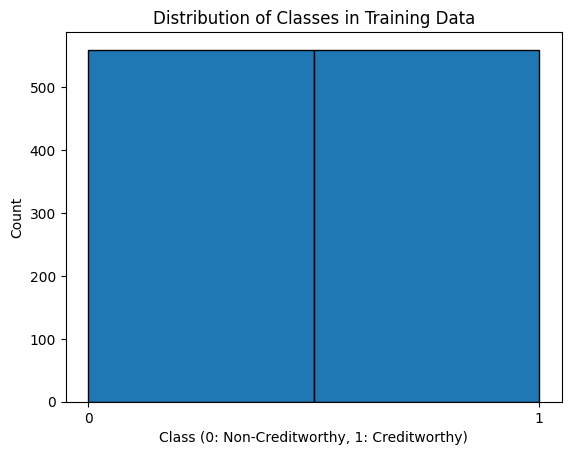

In [7]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import uniform 

In [9]:
# Создание модели Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=2000, tol=1e-2)
distribitions = {"penalty":["l1", "l2", "elasticnet"], 
                "C":[i / 25 for i in range(30, 125)], "fit_intercept":[True, False],
                "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
}
clf = GridSearchCV(logistic_regression_model, distribitions, scoring="roc_auc")
best_params = clf.fit(X_train, y_train)

/home/mianivo/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mianivo/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mianivo/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mianivo/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mianiv

In [10]:
logistic_regression_model = LogisticRegression(max_iter=1000, tol=1e-2, C=1.36, fit_intercept=False, penalty='l1', solver='liblinear')
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=1.36, fit_intercept=False, max_iter=1000, penalty='l1',
                   solver='liblinear', tol=0.01)

In [11]:
best_params.best_params_

{'C': 3.04, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}

In [12]:
# y_prob_logistic = clf.predict_proba(X_test)[:, 1]
y_prob_logistic = logistic_regression_model.predict_proba(X_test)[:, 1]
    
# y_pred_logistic = clf.predict(X_test)
y_pred_logistic = logistic_regression_model.predict(X_test)
    
    
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
    
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
    
    
precision_logistic = precision_score(y_test, y_pred_logistic)
    
    
recall_logistic = recall_score(y_test, y_pred_logistic)
    
    
print(f'Accuracy of Logistic Regression: {accuracy_logistic}')
    
    
print(f'ROC AUC of Logistic Regression: {roc_auc_logistic}')
    
    
print(f'Precision of Logistic Regression: {precision_logistic}')
    
    
print(f'Recall of Logistic Regression: {recall_logistic}')


Accuracy of Logistic Regression: 0.7642857142857142
ROC AUC of Logistic Regression: 0.8156122448979592
Precision of Logistic Regression: 0.7846153846153846
Recall of Logistic Regression: 0.7285714285714285


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели